In [18]:
from graph import Graph
from dijkstra import dijkstra_list, dijkstra_matrix
import time
import random
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Graph creation

In [2]:
list_graph = Graph(9, "adjacency_list")
matrix_graph = Graph(9, "adjacency_matrix")

# Add edges to list_graph
list_graph.add_edge(0, 1, 4)
list_graph.add_edge(0, 7, 8)
list_graph.add_edge(1, 2, 8)
list_graph.add_edge(1, 7, 11)
list_graph.add_edge(2, 3, 7)
list_graph.add_edge(2, 5, 4)
list_graph.add_edge(2, 8, 2)
list_graph.add_edge(3, 4, 9)

# Add edges to matrix_graph
matrix_graph.add_edge(0, 1, 4)
matrix_graph.add_edge(0, 7, 8)
matrix_graph.add_edge(1, 2, 8)
matrix_graph.add_edge(1, 7, 11)
matrix_graph.add_edge(2, 3, 7)
matrix_graph.add_edge(2, 5, 4)
matrix_graph.add_edge(2, 8, 2)
matrix_graph.add_edge(3, 4, 9)

In [3]:
print(list_graph)
print(matrix_graph)

0: [(1, 4), (7, 8)]
1: [(0, 4), (2, 8), (7, 11)]
2: [(1, 8), (3, 7), (5, 4), (8, 2)]
3: [(2, 7), (4, 9)]
4: [(3, 9)]
5: [(2, 4)]
6: []
7: [(0, 8), (1, 11)]
8: [(2, 2)]
[0, 4, 0, 0, 0, 0, 0, 8, 0]
[4, 0, 8, 0, 0, 0, 0, 11, 0]
[0, 8, 0, 7, 0, 4, 0, 0, 2]
[0, 0, 7, 0, 9, 0, 0, 0, 0]
[0, 0, 0, 9, 0, 0, 0, 0, 0]
[0, 0, 4, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[8, 11, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 2, 0, 0, 0, 0, 0, 0]


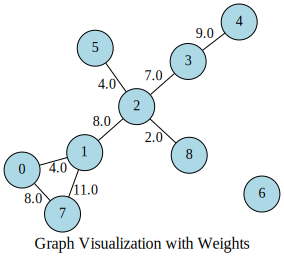

In [4]:
list_graph.visualize()

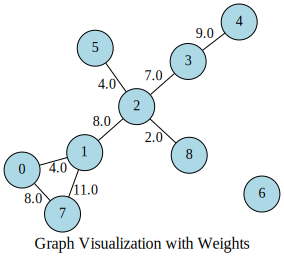

In [5]:
matrix_graph.visualize()

# Dijkstra test run

In [6]:
print(dijkstra_list(list_graph, 0))
print(dijkstra_matrix(matrix_graph, 0))

[0, 4, 12, 19, 28, 16, inf, 8, 14]
[0, 4, 12, 19, 28, 16, inf, 8, 14]


> ### (a) Suppose the input graph G = (V, E) is stored in an adjacency matrix and we use an array for the priority queue. Implement the Dijkstra’s algorithm using this setting and analyze its time complexity with respect to |V| and |E| both theoretically and empirically.

#### Dijkstra Algorithm - Adjacency Matrix & Array Priority Queue
- Theoretical Complexity : O(|V|<sup>2</sup>)
- Total Complexity: O(|V|<sup>2</sup>) (Due to adjacency matrix)

#### Option A: Dijkstra's Algorithm with Increasing Graph Size

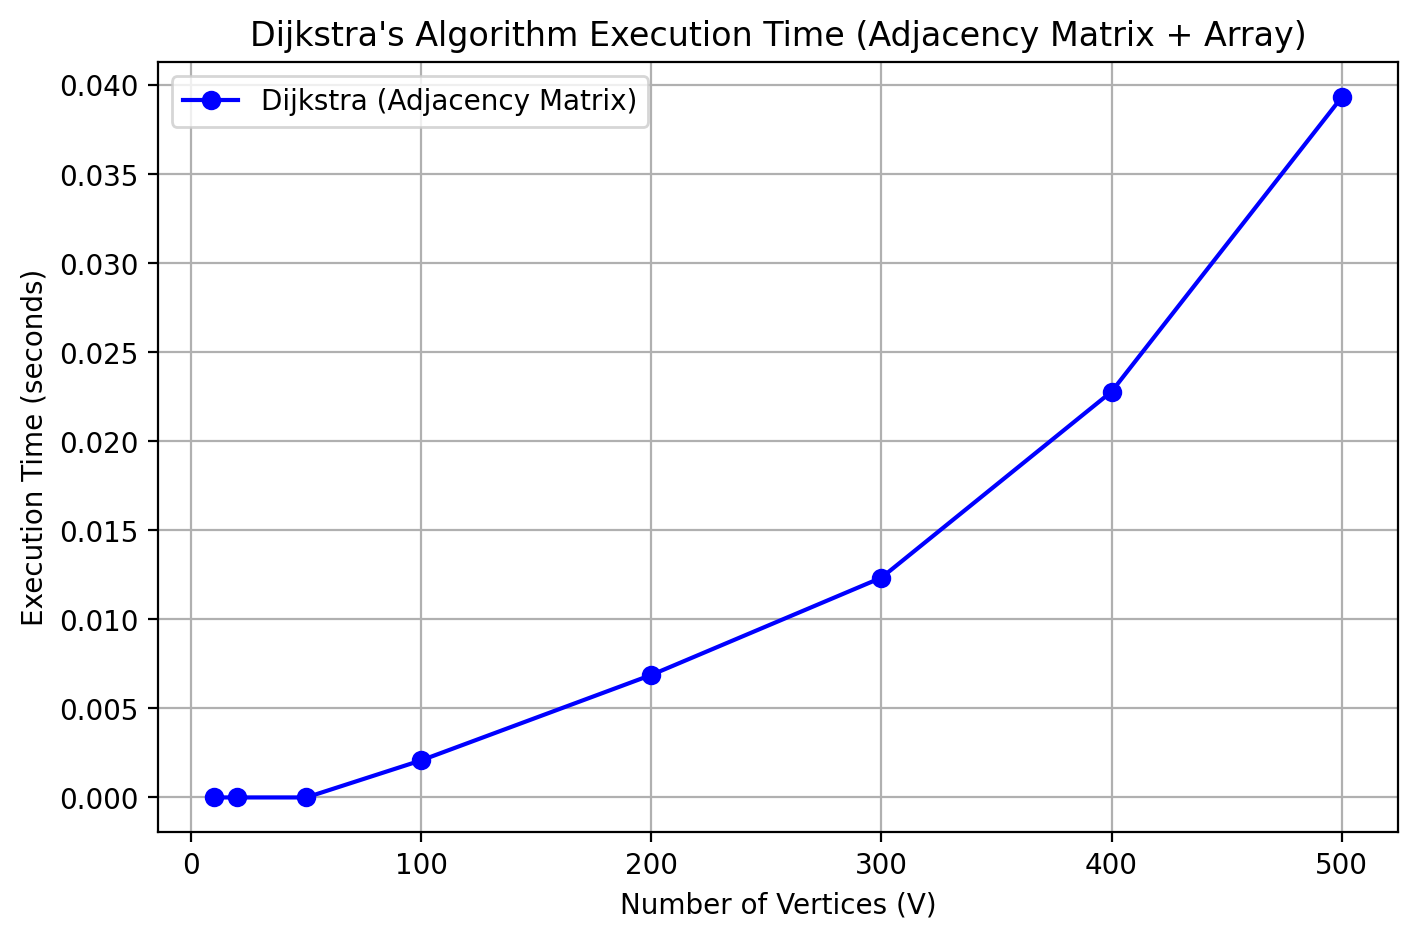

In [19]:
# Function to generate a random graph with adjacency matrix representation
def generate_random_matrix_graph(V, density=0.3):
    graph = Graph(V, "adjacency_matrix")
    
    for u in range(V):
        for v in range(u + 1, V):
            if random.random() < density:  # Randomly add edges
                weight = random.randint(1, 20)
                graph.add_edge(u, v, weight)

    return graph

# Measure execution time of Dijkstra's algorithm (adjacency matrix + array)
def benchmark_dijkstra_matrix(V, density=0.3):
    graph = generate_random_matrix_graph(V, density)
    
    start_time = time.time()
    dijkstra_matrix(graph, 0)
    return time.time() - start_time

# Experiment: Run Dijkstra on increasing graph sizes
V_values = [10, 20, 50, 100, 200, 300, 400, 500]
times = [benchmark_dijkstra_matrix(V) for V in V_values]

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(V_values, times, marker="o", linestyle="-", color="b", label="Dijkstra (Adjacency Matrix)")
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra's Algorithm Execution Time (Adjacency Matrix + Array)")
plt.legend()
plt.grid(True)
plt.show()


#### Option B: Dijkstra's Algorithm with Varying Edge Densities


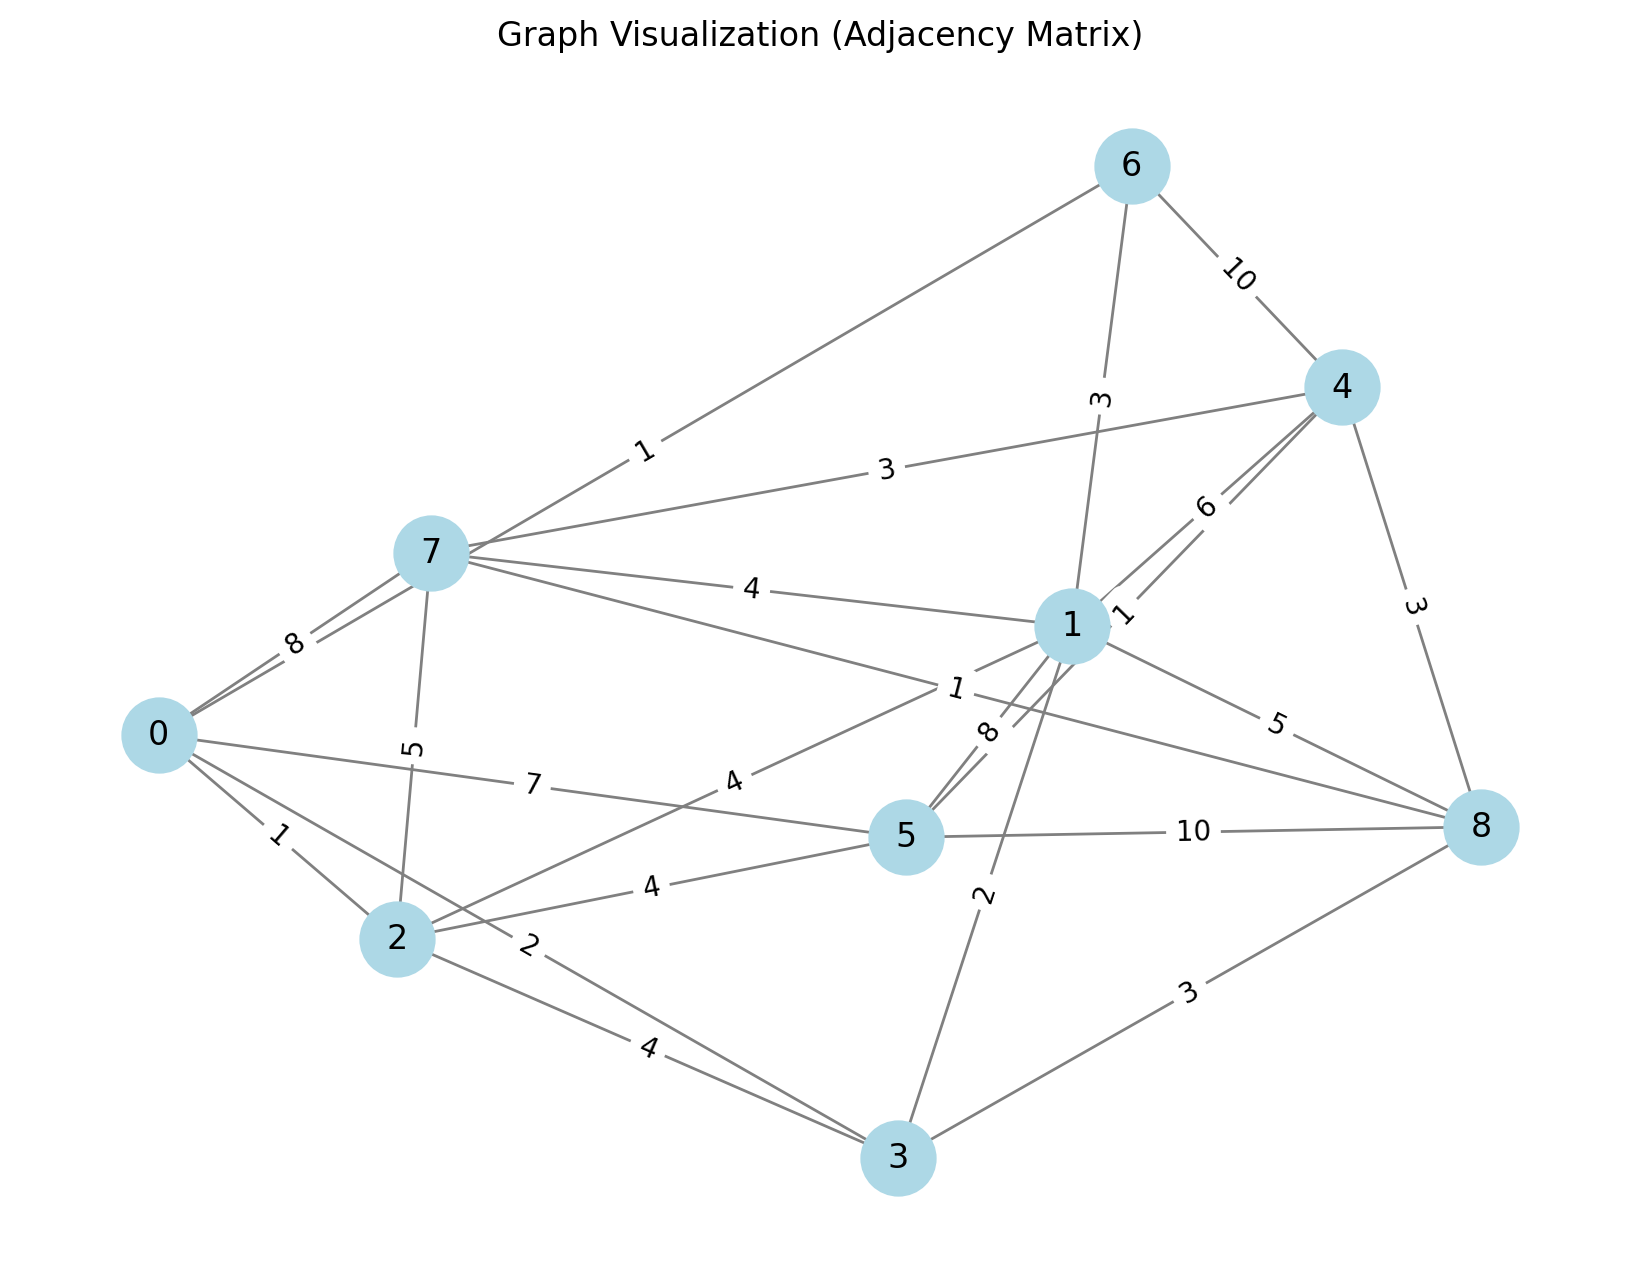

Graph Size: 5, Edge Density: 0.2, Time Taken: 0.00000 sec
Graph Size: 5, Edge Density: 0.4, Time Taken: 0.00000 sec
Graph Size: 5, Edge Density: 0.6, Time Taken: 0.00000 sec
Graph Size: 5, Edge Density: 0.8, Time Taken: 0.00000 sec
Graph Size: 10, Edge Density: 0.2, Time Taken: 0.00000 sec
Graph Size: 10, Edge Density: 0.4, Time Taken: 0.00000 sec
Graph Size: 10, Edge Density: 0.6, Time Taken: 0.00000 sec
Graph Size: 10, Edge Density: 0.8, Time Taken: 0.00000 sec
Graph Size: 20, Edge Density: 0.2, Time Taken: 0.00000 sec
Graph Size: 20, Edge Density: 0.4, Time Taken: 0.00000 sec
Graph Size: 20, Edge Density: 0.6, Time Taken: 0.00000 sec
Graph Size: 20, Edge Density: 0.8, Time Taken: 0.00000 sec
Graph Size: 50, Edge Density: 0.2, Time Taken: 0.00100 sec
Graph Size: 50, Edge Density: 0.4, Time Taken: 0.00100 sec
Graph Size: 50, Edge Density: 0.6, Time Taken: 0.00000 sec
Graph Size: 50, Edge Density: 0.8, Time Taken: 0.00000 sec
Graph Size: 100, Edge Density: 0.2, Time Taken: 0.00217 sec


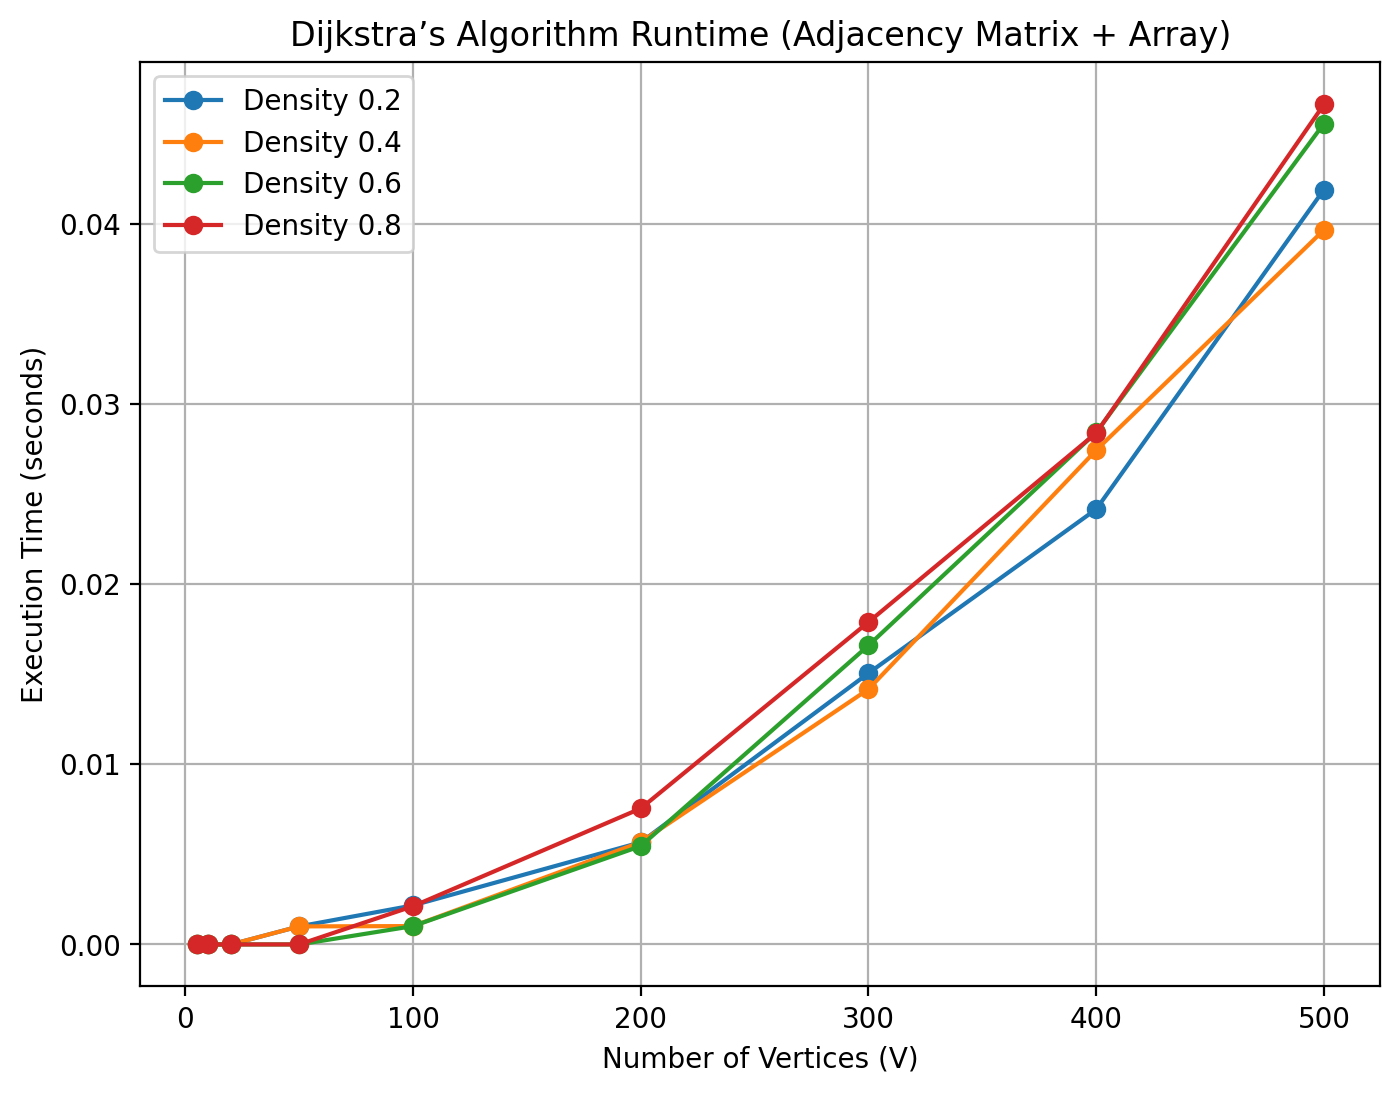

Shortest paths from node 0: [0, 4, 1, 2, 6, 5, 1, 6, 5]
Distance from node 0 to node 1: 4
Distance from node 0 to node 2: 1
Distance from node 0 to node 3: 2
Distance from node 0 to node 4: 6
Distance from node 0 to node 5: 5
Distance from node 0 to node 6: 1
Distance from node 0 to node 7: 6
Distance from node 0 to node 8: 5


In [20]:
def generate_graph_matrix(size, edge_density=0.5):
    """Generate a random adjacency matrix graph."""
    graph = Graph(size, "adjacency_matrix")
    num_edges = int(size * (size - 1) * edge_density)  # Approximate number of edges
    for _ in range(num_edges):
        u, v = random.sample(range(size), 2)
        weight = random.randint(1, 10)
        graph.add_edge(u, v, weight)
    return graph


def draw_graph(graph):
    """Visualize the graph using networkx and matplotlib."""
    G = nx.Graph()

    # Add edges with weights
    for u in range(graph.vertices):
        for v in range(graph.vertices):
            if graph.adj_matrix[u][v] > 0:
                G.add_edge(u, v, weight=graph.adj_matrix[u][v])

    # Draw the graph
    pos = nx.spring_layout(G)  # Layout for visualization
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=700, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Graph Visualization (Adjacency Matrix)")
    plt.show()


def measure_runtime():
    """Measure Dijkstra's runtime for increasing graph sizes and edge densities."""
    sizes = [5, 10, 20, 50, 100, 200, 300, 400, 500]  # Different graph sizes
    edge_densities = [0.2, 0.4, 0.6, 0.8]  # Different edge densities
    times = {size: [] for size in sizes}  # Initialize a dictionary to store times for each size

    # Testing graph size vs runtime
    for size in sizes:
        for density in edge_densities:
            graph = generate_graph_matrix(size, density)

            start_time = time.time()
            dijkstra_matrix(graph, 0)  # Run Dijkstra on vertex 0
            end_time = time.time()

            times[size].append(end_time - start_time)
            print(f"Graph Size: {size}, Edge Density: {density}, Time Taken: {end_time - start_time:.5f} sec")

    # Now plot runtime for each edge density
    plt.figure(figsize=(8, 6))

    # Plot times for different edge densities
    for i, density in enumerate(edge_densities):
        # Collect corresponding times for this density
        density_times = [times[size][i] for size in sizes]
        plt.plot(sizes, density_times, marker='o', linestyle='-', label=f"Density {density}")

    plt.xlabel("Number of Vertices (V)")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Dijkstra’s Algorithm Runtime (Adjacency Matrix + Array)")
    plt.legend()
    plt.grid()
    plt.show()



def test_dijkstra_correctness(graph):
    """Test the correctness of Dijkstra’s algorithm for the given graph."""
    # Run Dijkstra’s algorithm
    shortest_paths = dijkstra_matrix(graph, 0)

    # Verify the correctness: Check that the shortest paths are valid
    # This is a simplified check: for a more complex graph, you could compute the actual shortest path

    print("Shortest paths from node 0:", shortest_paths)
    for i in range(graph.vertices):
        if i != 0:
            print(f"Distance from node 0 to node {i}: {shortest_paths[i]}")


# Generate and visualize a random graph (for testing)
graph = generate_graph_matrix(9, edge_density=0.5)
draw_graph(graph)

# Measure and plot runtime
measure_runtime()

# Run correctness test
test_dijkstra_correctness(graph)


#### Conclusion Dijkstra Algorithm - Adjacency Matrix & Array Priority Queue

In our experiments, the execution time increases quadratically as the number of vertices (|V|) grows. This matches the theoretical complexity of O(|V|<sup>2</sup>), confirming that the adjacency matrix representation drives the time complexity.